# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>
</div>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import scipy and statsmodels libraries to use inbuild stats functions
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

# read the csv file with bosy temperatures
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# look at the dataframe 
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# descriptive statistics to start analysing data
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
# trom the dataframe, choose only temperature data
temp = df['temperature']
temp.head(2)

0    99.3
1    98.4
Name: temperature, dtype: float64

In [5]:
# From the dataset, infer stats like sample size, mean, min/max, variance, skewness and kurtosis
s, mnmx, mean, var, sk, kt = stats.describe(temp)
print('The sample size is', s)
print('The minimum and maximum values are',mnmx)
print('The mean for temperature data is',mean)
print('The variance is',var)
print('The skewness is',sk)
print('The kurtosis is',kt)

The sample size is 130
The minimum and maximum values are (96.299999999999997, 100.8)
The mean for temperature data is 98.2492307692
The variance is 0.537557543232
The skewness is -0.004367976879081625
The kurtosis is 0.7049597854114693



# Question 1

* Is the distribution of body temperatures normal?
* Although this is not a requirement for CLT to hold (read CLT carefully), 
it gives us some peace of mind that the population may also be normally distributed 
if we assume that this sample is representative of the population.


# Answer 1
* To answer the questions we can plot the data as a histogram to visually analyse is the distribution is Normal or Gaussian. 
* We can also use the Anderson-Darling Normality Test.

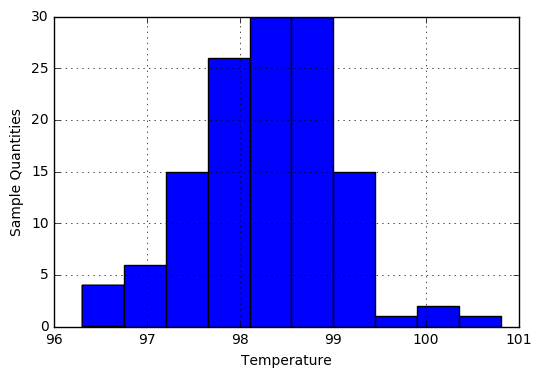

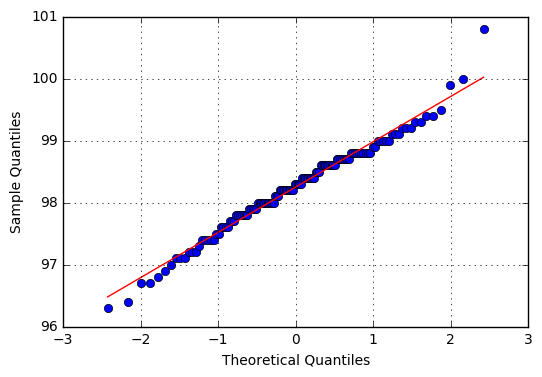

In [6]:
# to analyze if distribution is normal, plot the histogram
plt.hist(temp)
plt.xlabel('Temperature')
plt.ylabel('Sample Quantities')
plt.grid(True)

# a qq plot can also be used to give further information like variation from perfect normal distribution, outliers
sm.qqplot(temp, line='s')
plt.grid(True)

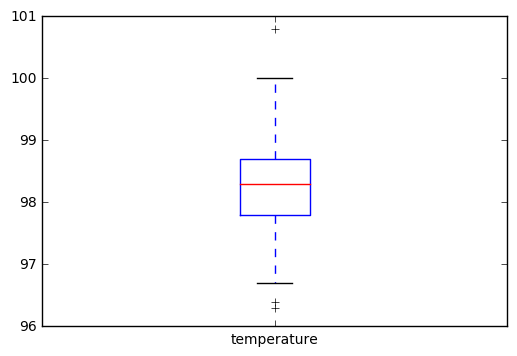

In [7]:
# to confirm the symmetry and outliers seen in qq plot , we can view a boxplot
temp.plot (kind= 'box')

The visual inspection indicates that the shape of the distribution conforms with what would be expected of a normal distribution: bell shaped histrogram skewed to the right. However, the q-q plot(red line is a perfect normal distribution) seems to waver towards the ends suggesting that it isn't a perfect normal distribution. This is confirmed by the boxplot which shows symmetry within the whiskers but with outliers. 

In [8]:
# After the plots, use the Anderson-Darling Normality Test
# Check for P-value.
# P-value < 0.05 = not normal. normal = P-value >= 0.05

s,p=stats.normaltest(df['temperature'])
print('p value is',p)
if p >= 0.05:
    print('p is greater than 0.05. So the distribution is normal')
else:
    print('p is less than 0.05. So the distribution is NOT normal')

p value is 0.258747986349
p is greater than 0.05. So the distribution is normal


# Question 2:
Is the sample size large? Are the observations independent?
* The sample n if less than 10% of the total population which is about 7.5 billion. However it is not insignificant either. Even though the sample size is not large, it is distributed normally. Hence statistical tests can be applied

# Question 3

* Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  t or  z statistic?
* Now try using the other test. How is the result be different? Why?


# Answer 3
Test the hypothesis that the temperature is 98.6 degrees F by looking at both t-statistic and z-score
* H0: The mean temperature is 98.6 degrees F
* HA: The mean temperature is NOT 98.6 degrees F


In [9]:
# using library functions, find the sample mean and standard deviation
# critical value (z_0.975 or z_0.025) = 1.96
sample_mean = temp.mean()
sample_std = temp.std()
cv = 1.96
print('For the sample, mean is %3.2f, standard deviation is %3.2f and critical value is 1.96' % (sample_mean, sample_std))

For the sample, mean is 98.25, standard deviation is 0.73 and critical value is 1.96


In [10]:
# using library functions, find the z-score
z, pval = sm.stats.ztest(temp, value = 98.6)
print('The calculated z-score is', z, 'and the p-value is ', pval)

# using library functions, find the z-score, t-statsistic and p-values
t, p = stats.ttest_1samp(temp,98.6)
print('The calculated t-statistic is', t, 'and the p-value is ', p)

# we can observe that even though the the z-score and t-statistic are similar, the p values are very different
# the null hypothesis can be tested against the p-values
if p >= cv and pval>= cv:
    print('p-value is greater than critical value in both cases. So the temperature is 98.6 degrees F. Accept null hypothesis')
else:
    print('p-value is less than critical value in both cases. So the mean temperature is NOT 98.6 degrees F. Reject null hypothesis')

The calculated z-score is -5.45482329236 and the p-value is  4.9021570141e-08
The calculated t-statistic is -5.45482329236 and the p-value is  2.41063204156e-07
p-value is less than critical value in both cases. So the mean temperature is NOT 98.6 degrees F. Reject null hypothesis


The “One Sample T-Test” is used to compare a sample's average value to a single number. T-test is more appropriate as it adjusts the shape according to the sample size whereas as z-score assumes standard normal distribution. We can also deduce that the sample is statistically different from the null hypothesis of 98.6 degree F body temperature as the p-values are very small..

# Question 4

* At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval


# Answer 4
Lets define abnormal as temperature that is 95% outside confidence interval.

We already deduced that the critical value (z_0.975 or z_0.025) = 1.96
*margin of error = critical value * (standard deviation/sqrt(sample size))

For known standard deviation:
* CI (high) = mean + margin or error
* CI (low) = mean - margin or error
Since all values are known, the calculation is as follows

In [11]:
# calculate margin_error using formula
std_error = sample_std / np.sqrt(len(df))
margin_error = cv * std_error
print('Standard error is', std_error, 'and margin of error is', margin_error)

ci_high = sample_mean + margin_error
ci_low = sample_mean - margin_error
print('Abnormal temperatures lie outside this range: lower than', ci_low,'and higher than', ci_high)

Standard error is 0.0643044168379 and margin of error is 0.126036657002
Abnormal temperatures lie outside this range: lower than 98.1231941122 and higher than 98.3752674262


# Question 5

* Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.


# Answer 5

To find if there a significant difference between males and females in normal temperature, we can do a two-sample t-test. We can use the two-sample z-test to evaluate the difference between two groups because:
* The two samples represent the same group
* They are independent
* They are normally distributed
The z-score is computed as follows:
z = (observed difference - expected difference)/standard error for difference

The null and alternate hypothesese are as follows:
* H0: There is no significant difference between males and females in normal temperature
* HA: There is a significant difference between males and females in normal temperature

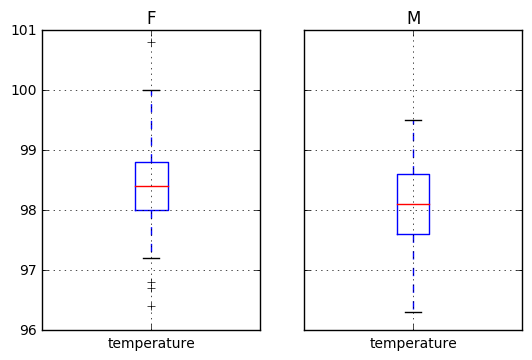

In [12]:
# create two datasets and separate male and female temperature to test difference
m_temp = df[df['gender'] == 'M']['temperature']
f_temp = df[df['gender'] == 'F']['temperature']

# visual inspection
df[['gender', 'temperature']].groupby('gender').boxplot(return_type='axes');

In [13]:
# descriptive stats for male temperatures
m_temp.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [14]:
# descriptive stats and female temperatures
f_temp.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [15]:
# difference in means between the two samples
m_mean = m_temp.mean()
f_mean = f_temp.mean()
diff = m_mean - f_mean

# find the variances between male and female temperatures
m_std = m_temp.var()
f_std = f_temp.var()

# find t-statistics to test if there is significant difference
tval = diff/(np.sqrt(m_std/len(m_temp) + f_std/len(f_temp)))
print('The t-statistic by comparing the two samples is ',tval)

# compare t-statistic to critical value to test hypotheses
if tval >= cv:
    print('t-statistic value is greater than critical value. There is no significant difference in temperatures between genders. Accept null hypothesis.')
else:
    print('t-statistic value is less than critical value. There is a significant difference in temperatures between genders. Reject null hypothesis.')



The t-statistic by comparing the two samples is  -2.28543453817
t-statistic value is less than critical value. There is a significant difference in temperatures between genders. Reject null hypothesis.


In [16]:
# the two sample t-test can also be computed using the library function
tv, pv = stats.ttest_ind(m_temp,f_temp)
print('t-staistic:',tv,'p-value',pv)

# compare t-statistic to critical value to test hypotheses
if tv >= cv:
    print('t-statistic value is greater than critical value. There is no significant difference in temperatures between genders. Accept null hypothesis.')
else:
    print('t-statistic value is less than critical value. There is a significant difference in temperatures between genders. Reject null hypothesis.')



t-staistic: -2.28543453817 p-value 0.0239318831224
t-statistic value is less than critical value. There is a significant difference in temperatures between genders. Reject null hypothesis.


The null hypothesis is rejected, since p-value is less 0.05. We conclude that based on the two group samples, there is a difference between male and female body temeperatures in a specific population. 